In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

## Visualizing the data

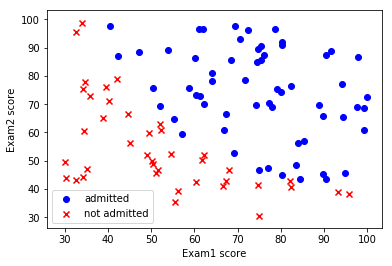

In [5]:
data = pd.read_csv('data/ex2data1.txt', header=None, usecols=[0, 1, 2])


def plot_data(df, xaxis, yaxis, label0, label1):
    plt.scatter(df[df[2] == 1][0], df[df[2] == 1][1], marker='o', c='blue', label=label1)
    plt.scatter(df[df[2] == 0][0], df[df[2] == 0][1], marker='x', c='red', label=label0)
    plt.xlabel(xaxis)    
    plt.ylabel(yaxis)
    plt.legend()
        
        
plot_data(data, 'Exam1 score', 'Exam2 score', 'not admitted', 'admitted')

In [128]:
## 1.2 Implementation

In [129]:
### 1.2.1 Sigmoid function

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


print(sigmoid(0))

0.5


In [131]:
### 1.2.2 Cost function and gradient

In [7]:
def cost_func(theta, x, y):
    theta = theta.T
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    J = 1/m*(-y.T.dot(np.log(h))-(1-y.T).dot(np.log(1-h)))
    return J

    
x = data.values[:, 0:2]
y = data.values[:, 2:3]
nx = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.zeros(nx.shape[1])
cost = cost_func(theta, nx, y)

print(cost)  # 나는 왜 1/100 결과가 나오는가..? 그리고 shape 도 이상한듯

[0.69314718]


In [8]:
def grad(theta, x, y):
    theta = theta.reshape(x.shape[1], 1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    # print(h.shape, y.shape, (h-y).shape)    # 왜 (1x3) - (100,1) = (100,3) 이 되는걸까?
    g = 1/m * (x.T.dot(h-y))
    return g.flatten()


x = data.values[:, 0:2]
y = data.values[:, 2:3]
nx = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.zeros(nx.shape[1])
print(grad(theta, nx, y))

# 왜 shape 는 (3,3) 일까?

[ -0.1        -12.00921659 -11.26284221]


In [9]:
def opt(theta, x, y):
    return op.minimize(cost_func, theta, args=(x, y), method=None, jac=grad, options={'maxiter':400}).x


nx = np.c_[np.ones((x.shape[0], 1)), x]
y = data.values[:, 2:3]
theta = np.zeros((nx.shape[1], 1))
opt(theta, nx, y)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


array([-25.16133284,   0.2062317 ,   0.2014716 ])

## Using Scikit Learn

[[0.38537034 0.61462966]]
[1.]
[[0.03844482 0.03101855]]
[[0.61462966]]


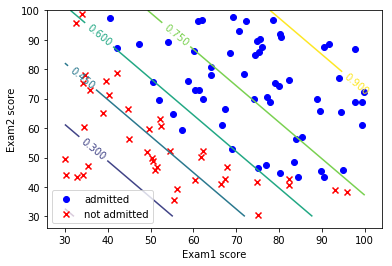

In [10]:
model = LogisticRegression()
x = data.values[:, 0:2]
# x = np.c_[np.ones(x.shape[0]), x]
y = data.values[:, 2:3]
y = np.ravel(y)  # same as y.flatten()

model.fit(x, y)
model.score(x, y)

print(model.predict_proba(np.array([[45, 85]])))  # admission probability : 0.615 문제에선 0.776
print(model.predict(np.array([[45, 85]])))  # 1 이므로 합격이라 생각함
print(model.coef_)

print(sigmoid(model.coef_.dot(np.array([[45], [85]])) + model.intercept_))  # predict_proba와 동일한 결과

gx = np.linspace(30, 100, 71)
gy = np.linspace(30, 100, 71)
xx, yy = np.meshgrid(gx, gy)

# print(np.c_[xx.ravel(), yy.ravel()].dot(model.coef_.T))
h = sigmoid(np.c_[xx.ravel(), yy.ravel()].dot(model.coef_.T)+model.intercept_)
h = h.reshape(xx.shape)

cont = plt.contour(xx, yy, h)

plt.clabel(cont)    # label 붙여주기위함
plot_data(data, 'Exam1 score', 'Exam2 score', 'not admitted', 'admitted')

## Regularized logistic regression

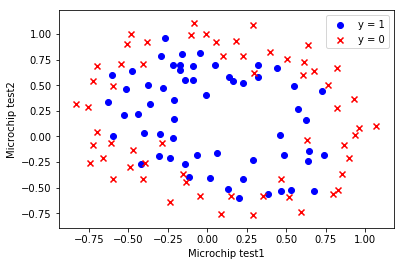

In [11]:
data2 = pd.read_csv('data/ex2data2.txt', header=None, usecols=[0, 1, 2])
plot_data(data2, 'Microchip test1', 'Microchip test2', 'y = 0', 'y = 1')

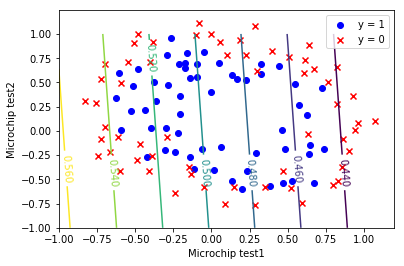

In [200]:
"""
아래는 잘못된 방법이다.
logistic Regression 적용했는데, x가 2개 파라미터 이므로 선형 형태가 나와서,
아래의 경계와 같이 선형으로 경계가 형성되었다.

아래에 Polynomial Features 를 적용한 방법으로 parameter 뻥튀기 해서 진행해야된다.
"""

model2 = LogisticRegression()
x = data2.values[:, 0:2]
y = data2.values[:, 2:3].flatten()

model2.fit(x, y)
model2.score(x, y)

u = np.linspace(-1, 1, 50)
v = np.linspace(-1, 1, 50)

uval, vval = np.meshgrid(u, v)

h2 = sigmoid(np.c_[uval.ravel(), vval.ravel()].dot(model2.coef_.T)+model2.intercept_)
h2 = h2.reshape(uval.shape)

cont = plt.contour(uval, vval, h2)

plt.clabel(cont)    # label 붙여주기위함
plot_data(data2, 'Microchip test1', 'Microchip test2', 'y = 0', 'y = 1')


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5', 'x0^6', 'x0^5 x1', 'x0^4 x1^2', 'x0^3 x1^3', 'x0^2 x1^4', 'x0 x1^5', 'x1^6']
28


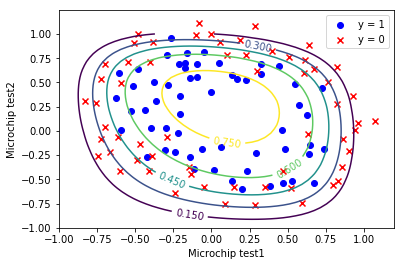

In [16]:
"""
Polynomial Features 적용한 예.

TODO : gaussian factor 적용 안해봄  (Regularization 필요)
"""
model3 = PolynomialFeatures(6)  # 문제에서 6차 하라고함
x = data2.values[:, 0:2]
y = data2.values[:, 2:3].flatten()

# model3.fit(x, y)  # fit vs fit_transform 차이가 뭘까? 
xx = model3.fit_transform(x, y)
# print(xx.shape)  # data가 118개이고, 0항 붙여서 6+1 되고, 1~7 의 합이 28임, xx 는 각 항들의 계수가 들어있음
print(model3.get_feature_names())  # x0, x1, x0^2 등 .. features 를 출력함
print(len(model3.get_feature_names()))
lrmodel = LogisticRegression()
lrmodel.fit(xx, y)

uval, vval = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
h2 = sigmoid(model3.fit_transform(np.c_[uval.ravel(), vval.ravel()]).dot(lrmodel.coef_.T)+lrmodel.intercept_)
h2 = h2.reshape(uval.shape)

cont = plt.contour(uval, vval, h2)

plt.clabel(cont)    # label 붙여주기위함
plot_data(data2, 'Microchip test1', 'Microchip test2', 'y = 0', 'y = 1')
